In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

api_key = str(input("What is your OpenWeatherMap.org API key? "))

## This function returns the latitude, longitude, and current temperature based on a city input
## it uses the apen weather map API to get this data
def get_data(city):
    global api_key
    url = "https://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s&units=imperial" % (city, api_key)
    
    response = requests.get(url)
    data = json.loads(response.text)
    
    return [data['coord']['lat'] , data['coord']['lon'], data['main']['temp']]

## This function returns the current temperature for a given lat/lon input
def get_temp(lat,lon):
    global api_key
    url = "https://api.openweathermap.org/data/2.5/onecall?lat=%s&lon=%s&appid=%s&units=imperial" % (lat, lon, api_key)

    response = requests.get(url)
    data = json.loads(response.text)
    return [data['current']['temp']]

# These are the cities we're going to use
city_names = ['Baltimore',\
              'New York',\
              'Miami',\
              'San Diego',\
              'Seattle',\
              'Minneapolis',\
              'Atlanta',\
              'Las Vegas',\
              'Austin',\
              'Jackson',\
              'Colorado',\
              'Louisville',\
              'Honolulu',\
              'Fairbanks',\
              'San Juan',\
              'Juneau',\
              'Bangor',\
              'Los Angeles',\
              'San Francisco',\
              'Detroit',\
              'El Paso',\
              'Fargo',\
              'Santiago',\
              'Rio de Janeiro',\
              'Resolute',\
              'Nuuk',\
              'Havana',\
              'Panama City',\
              'Lima',\
              'Buenos Aires',\
              'Puerto Williams'              
              ]

city_info = []
for i in city_names:
    #getting data
    lat=  get_data(i)[0]
    lon = get_data(i)[1]
    current_temp = get_data(i)[2]
    opposite_temp = get_temp(-lat,-lon)[0] # negative values of \
        #lat and lon represent the values on the other side of the world
    #creating list to structure data, before converting to dataframe
    temp_delta = current_temp - opposite_temp
    city_info.append( 
        {
            'City': i,
            'Lat': lat,
            'Lon': lon,
            'Current Temp': current_temp,
            'Temp on Opposite Side of the World': opposite_temp,
            'Temperature Difference': temp_delta
        }
    )
city_info_df = pd.DataFrame(city_info)
output_data_file = city_info_df.to_csv('Vaughan Weather Analysis Data Output')
city_info_df.head(50)


What is your OpenWeatherMap.org API key? 9d8724e5d5e9bb1af6a56f29d565efc2


,City,Lat,Lon,Current Temp,Temp on Opposite Side of the World,Temperature Difference
0,Baltimore,39.29,-76.61,67.24,52.07,15.17
1,New York,40.71,-74.01,63.37,51.89,11.48
2,Miami,25.77,-80.19,83.05,64.36,18.69
3,San Diego,32.72,-117.16,68.40,62.96,5.44
4,Seattle,47.61,-122.33,58.30,46.31,11.99
5,Minneapolis,44.98,-93.26,54.39,41.13,13.26
6,Atlanta,33.75,-84.39,65.05,56.46,8.59
7,Las Vegas,36.17,-115.14,84.81,56.64,28.17
8,Austin,30.27,-97.74,72.41,58.78,13.63
9,Jackson,42.42,-122.83,63.90,49.57,14.33


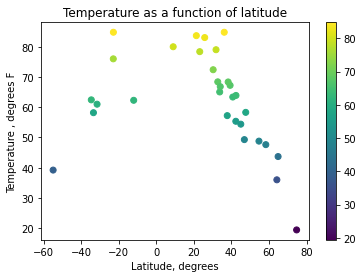

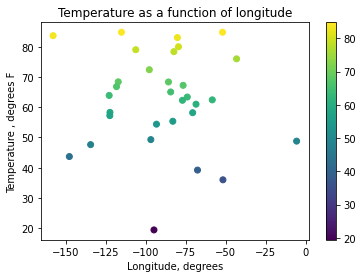

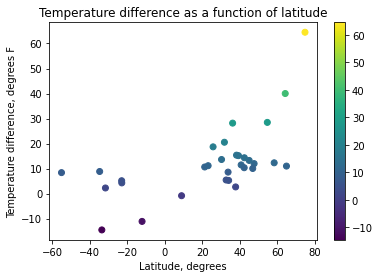

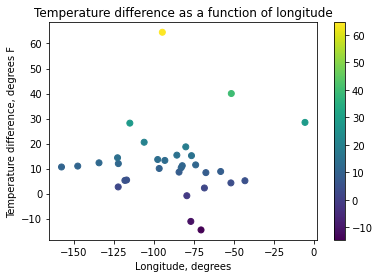

In [2]:
import matplotlib.pyplot as plt

##Verifying that the data looks good
plt.figure(1)
plt.scatter(city_info_df['Lat'], city_info_df['Current Temp'], c = city_info_df['Current Temp'])
plt.title('Temperature as a function of latitude')
plt.xlabel("Latitude, degrees")
plt.ylabel("Temperature , degrees F")
plt.colorbar()
plt.show
plt.savefig('Current Temperature as a function of latitude.png', bbox_inches='tight')

plt.figure(2)
plt.scatter(city_info_df['Lon'], city_info_df['Current Temp'], c = city_info_df['Current Temp'])
plt.title('Temperature as a function of longitude')
plt.xlabel("Longitude, degrees")
plt.ylabel("Temperature , degrees F")
plt.colorbar()
plt.show
plt.savefig('Current Temperature as a function of longitude.png', bbox_inches='tight')

##These are the temperature difference plots
plt.figure(3)
plt.scatter(city_info_df['Lat'], city_info_df['Temperature Difference'], c = city_info_df['Temperature Difference'])
plt.title('Temperature difference as a function of latitude')
plt.xlabel("Latitude, degrees")
plt.ylabel("Temperature difference, degrees F")
plt.colorbar()
plt.show
plt.savefig('Temp difference as a function of latitude', bbox_inches='tight')

plt.figure(4)
plt.scatter(city_info_df['Lon'], city_info_df['Temperature Difference'], c = city_info_df['Temperature Difference'])
plt.title('Temperature difference as a function of longitude')
plt.xlabel("Longitude, degrees")
plt.ylabel("Temperature difference, degrees F")
plt.colorbar()
plt.show
plt.savefig('Temp difference as a function of longitude', bbox_inches='tight')

# Technical Report
## Abstract/Summary
In the top section of code, there are two functions, each uses the OpenWeatherMap API. 
    The first function, get_data, accepts a city as a string input, uses the requests and json libraries, and returns the current temperature and the city's coordinates. 
    The second function, get_temp, accepts latitude and longitude coordinates, and returns the curernt temperature at those coordinates.

The next section is a list of all cities. A for loop loops through this list, uses the functions described above, gets the data, and organizes it. It also gets the temperature at the point on the exact opposite side of the world, identified here as a city's 'opposite point.'
    
The next section uses MatPlotLib to plot this data, using similiar commands that I used in HW-1.

## Getting Data
To elaborate on the data gathering more, there were two APIs used, one that gathers a city's temperature (with a string input, of the city's name), and one that gathers the temperature for given coordinates. The functions that this Jupyer notebook uses leverages these, along with the request and json libraries, to simplify and organize the outputs of these APIs.
To detail the for loop that these functions are used in, the for loop creates a Pandas DataFrame to get the coorindates for each city, the current temperatues and the current temperature on the exact opposite side of the world ('oppoiste point'). The opposite point coorindates were calculated by taking the negative of each coordinate (longitude and latitude).
## Data Analysis

The initial analysis verified the data made sense. It verified that the close to the equator (having a longitude of 0), the warmer it is. The latitude data doesn't have much a trend, as there are more important than latitude (such as elevation and latitude).

After some plots of these, the next two plots point to the operative question being answered in this analysis: what is the correlation between the coorindates of a given city, and the temperature on the exact opposite side of the world? The results showed that the further away from the equator a city is, the greater the temperature difference is between that city and the point exactly opposite on the world of that city. The most extreme data point, purposely chosen to be very far north (Resolute, Canada), followed a similar trend. It did, and it also showed a huge tempreature difference between its opposite point (70 degrees F). However, it was a bit of an outlier, as other cities that had a latitude within 10 degrees only had temperature differences in the 20-40 range.
There was no correlation between the longitude and the temperature opposite the city. This is consistent with there not being any correlation between longitude and the current temperature.

Overall, there were not as big of temperature variations between a city and its opposite point. I suspect a leading reason for this is that we're close to the fall equinox, where half of the world is in the middle of fall, and the other half of the world is in the middle of spring. Overall, the weather is milder in the world during this season. We would get more interesting data with larger temperature differences if this test was run during the peak of summer or winter.
## Conclusions
The conclusions that I found were that the OpenWeatherMap API produced easily organized data, that a Pandas DataFrame could be used to organize and plot this data. We saw a greater temperature difference between a city and its 'opposite point' when it was further away from the equator.
It would also be very interesting to run this test in a differrent season, when cities are at their high or low limits for their annual temperatures.